# Language Analysis: Bangladesh
Analyzing the language of **accounts and tweets** identified by Twitter to be associated with the country's information operations.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import langdetect
from collections import Counter
import iso639 as pylang
import seaborn as sns

twitter_color = (0.114, 0.631, 0.949, 1.0)

---
## Tweet Language Summary

In [2]:
filename = '../Data/bangladesh_201901_1_tweets_csv_hashed.csv'

#### Import dataset

In [3]:
ban = pd.read_csv(filename, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

#### Print number of tweets

In [4]:
print(len(ban))

26214


#### Print features that we can access

In [5]:
ban.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

#### Sample data of tweets & their detected language

In [6]:
for elem in ban.head(5)['tweet_text']:
    print(elem)
    print(langdetect.detect(elem))
    print()

হকিতে তিনি নেই, তিনি আছেন https://t.co/sAMErcn3OF
bn

মুম্বাই চলচ্চিত্রের অঘটনঘটনপটিয়সীদের কথা বললে.. সালমান খানের নাম আসবেই। আর বলিউডের... https://t.co/CQaa7w0DpA
bn

ডাকসু নিয়ে ছাত্র নেতাদের সঙ্গে রোববার আলোচনায় বসবে ঢাবি প্রশাসন https://t.co/D3ZbQUZ4gD
bn

ব্রাহ্মণবাড়িয়ায় স্বামীকে হত্যার দায়ে স্ত্রীসহ ৪ জনের মৃত্যুদণ্ড https://t.co/SzW84Pfewz
bn

র‌্যাবের বৈশাখে পালকিতে চড়ে মঞ্চে এলেন স্বরাষ্ট্রমন্ত্রী https://t.co/wLSX6f2Jti
bn



#### Detect language of tweets & store in a list

In [7]:
tweet_languages = []

for tweet_text in ban['tweet_text']:
    lang = ''
    try:
        lang = langdetect.detect(tweet_text)
    except:
        lang = 'n/a'
    tweet_languages.append(lang)

#### Get counts of each language

In [8]:
tweet_languages_count = Counter(tweet_languages)
print(tweet_languages_count)

Counter({'bn': 20830, 'en': 3507, 'n/a': 1117, 'ar': 271, 'id': 75, 'tl': 59, 'so': 45, 'af': 37, 'et': 34, 'de': 23, 'nl': 20, 'fr': 19, 'es': 17, 'sw': 16, 'da': 15, 'sv': 13, 'no': 13, 'fi': 12, 'hr': 10, 'it': 10, 'sq': 9, 'ca': 8, 'tr': 7, 'pl': 7, 'sk': 7, 'ro': 7, 'cy': 6, 'pt': 4, 'lv': 3, 'sl': 3, 'lt': 3, 'ru': 1, 'th': 1, 'hu': 1, 'vi': 1, 'cs': 1, 'ur': 1, 'fa': 1})


#### Plot language counts

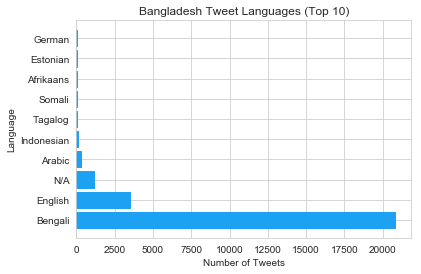

In [10]:
tweet_lang_types = []
tweet_lang_counts = []
sorted_tweet_languages_count = tweet_languages_count.most_common(10)

for lang, count in sorted_tweet_languages_count:
    tweet_lang_types.append(lang)
    tweet_lang_counts.append(count)

tweet_lang_types_long = []
for lang in tweet_lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        tweet_lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        tweet_lang_types_long.append('N/A')

# Labels
plt.title('Bangladesh Tweet Languages (Top 10)')
plt.xlabel('Number of Tweets')
plt.ylabel('Language')

# Add Data
y_pos = np.arange(len(tweet_lang_types_long))
sns.set_style('whitegrid')
plt.barh(y_pos, tweet_lang_counts, color = twitter_color, edgecolor = twitter_color)
plt.yticks(y_pos, tweet_lang_types_long)

plt.show()

---
## Account Language Summary

In [12]:
accounts_filename = '../Data/bangladesh_201901_1_users_csv_hashed.csv'

# Import dataset
ban_users = pd.read_csv(accounts_filename, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})

In [13]:
print(len(ban_users))

15


#### Print available features

In [14]:
ban_users.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

#### Sample data of account languages

In [15]:
for elem in ban_users.head(5)['account_language']:
    print(elem)

en
en
en
en
en


#### Get counts of each language

In [16]:
languages_count = Counter(ban_users['account_language'])
print(languages_count)

Counter({'en': 15})


#### Plot language counts

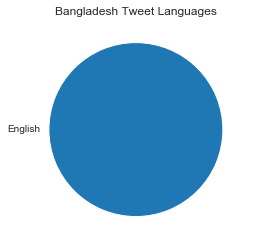

In [20]:
lang_types = []
lang_counts = []
sorted_languages_count = languages_count.most_common(10)

for lang, count in sorted_languages_count:
    lang_types.append(lang)
    lang_counts.append(count)

lang_types_long = []
for lang in lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        lang_types_long.append('N/A')

plt.pie(lang_counts, labels = lang_types_long)
plt.title('Bangladesh Tweet Languages')

plt.show()